# Building a Convolutional Neural Network (CNN) 
# for Fashion-MNIST with PyTorch

- Master Applied AI - Amsterdam University of Applied Sciences
- Bootcamp Computer Vision - Michiel Bontenbal 28 aug 2025


Based on the book by Laurence Moroney: "AI and ML for Coders in PyTorch"
https://learning-oreilly-com.rps.hva.nl/library/view/ai-and-ml/9781098199166/ 

Beschikbaar via de HvA bibliotheek:
https://lib.hva.nl/permalink/31UKB_UAM2_INST/ooc2dr/alma9939149327405132

Tutorials:
- https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial
- https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/ 

In [16]:
 # imports
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

print(torch.__version__)

2.2.2


In [17]:
import platform
print(platform.python_version())

3.12.2


In [18]:
# Load and transform the dataset
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
# Inspect the size of the datasets
len(train_dataset), len(test_dataset)

(60000, 10000)

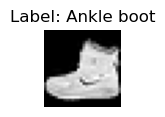

Image shape: (28, 28)
Label: 9 (Ankle boot)


In [27]:
# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get the first image and label
image, label = train_dataset[0]

# Convert tensor to numpy array and reshape
image_np = image.squeeze().numpy()  # Remove the channel dimension and convert to numpy

# Create the plot
plt.figure(figsize=(1, 1))
plt.imshow(image_np, cmap='gray')
plt.title(f'Label: {class_names[label]}')
plt.axis('off')
plt.show()

print(f'Image shape: {image_np.shape}')
print(f'Label: {label} ({class_names[label]})')

In [ ]:
# Create model using nn.Sequential 
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  # Output: [batch, 32, 14, 14]
    nn.Flatten(),
    nn.Linear(32 * 14 * 14, 128),  # Adjusted input size due to Conv and Pool layers
    nn.ReLU(),
    nn.Linear(128, 10),
)

In [20]:
# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [21]:
# Lists to store metrics
epoch_losses = []
epoch_accuracies = []

# Training loop
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    size = len(train_loader.dataset)
    model.train()
    epoch_loss = 0.0
    correct = 0
    
    for batch, (X, y) in enumerate(train_loader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_function(pred, y)
        
        # Calculate accuracy
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        
        # Accumulate loss for epoch
        epoch_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
    
    # Calculate epoch metrics
    avg_loss = epoch_loss / len(train_loader)
    accuracy = 100 * correct / size
    epoch_losses.append(avg_loss)
    epoch_accuracies.append(accuracy)
    
    print(f"Epoch {t+1} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Done!")


Epoch 1
-------------------------------
loss: 2.303736 [    0/60000]
loss: 0.541766 [ 6400/60000]
loss: 0.480673 [12800/60000]
loss: 0.584789 [19200/60000]
loss: 0.373626 [25600/60000]
loss: 0.384375 [32000/60000]
loss: 0.371848 [38400/60000]
loss: 0.213687 [44800/60000]
loss: 0.322267 [51200/60000]
loss: 0.370156 [57600/60000]
Epoch 1 - Loss: 0.4476, Accuracy: 84.04%
Epoch 2
-------------------------------
loss: 0.233894 [    0/60000]
loss: 0.299843 [ 6400/60000]
loss: 0.399751 [12800/60000]
loss: 0.218093 [19200/60000]
loss: 0.224761 [25600/60000]
loss: 0.237845 [32000/60000]
loss: 0.156035 [38400/60000]
loss: 0.193072 [44800/60000]
loss: 0.207214 [51200/60000]
loss: 0.280322 [57600/60000]
Epoch 2 - Loss: 0.2978, Accuracy: 89.24%
Epoch 3
-------------------------------
loss: 0.258699 [    0/60000]
loss: 0.196435 [ 6400/60000]
loss: 0.248601 [12800/60000]
loss: 0.297696 [19200/60000]
loss: 0.108606 [25600/60000]
loss: 0.185014 [32000/60000]
loss: 0.312980 [38400/60000]
loss: 0.209095 

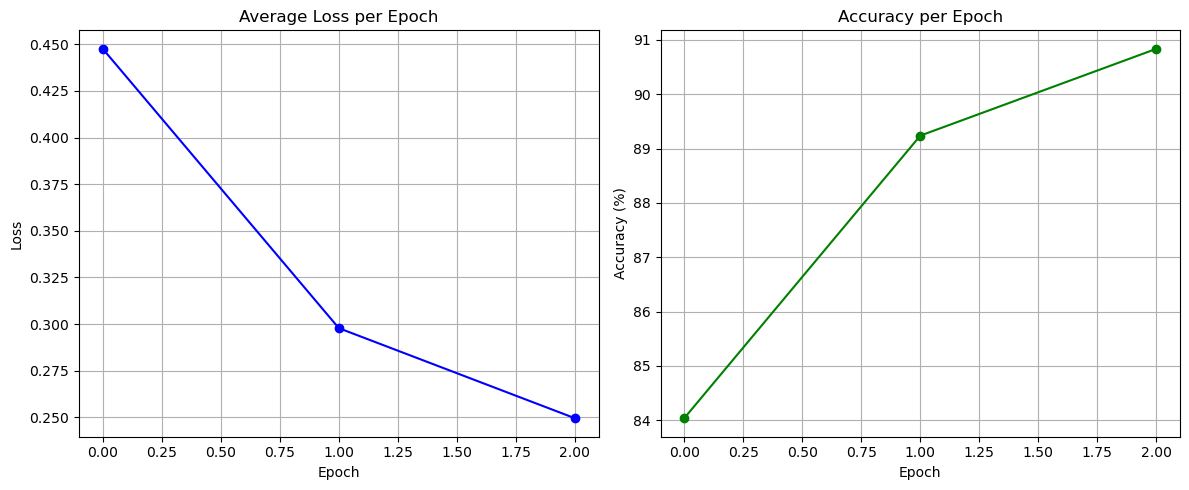

In [22]:

# Create the plots
plt.figure(figsize=(12, 5))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(epoch_losses, marker='o', color='b')
plt.title('Average Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(epoch_accuracies, marker='o', color='g')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Exercises

### Exercise 0
Run the script and ensure it works correctly. Write down the accuracy.

### Exercise 1:
Add an extra Conv2D layer and Pooling layer to the CNN architecture.
Write down the new accuracy.

### Exercise 2:
Adjust the parameters.
Write down the new accuracy.

### Exercise 3:
Adjust the hyperparameters of the model.
Write down the new accuracy.



## Reflectie vragen

### Reflectie
Deze vragen gaan over het begrip van het model wat je hebt gebruikt. 
Beantwoord de volgende vragen in je eigen woorden. 

1. Welke lagen heb je gebruikt in je model?

2. Beschrijf kort hoe de Conv2D laag werkt (in je eigen woorden)

3. Waarom gebruik je een pooling laag?

4. Wat doet de linear laag?